In [2]:
import pandas as pd

#file paths
file_paths = {
    'u_data': '/content/u.data',
    'u_info': '/content/u.info',
    'u_item': '/content/u.item',
    'u_genre': '/content/u.genre',
    'u_user': '/content/u.user',
    'u_occupation': '/content/u.occupation',
}

In [3]:
#Data Augmentation
df = pd.read_csv(file_paths['u_data'], sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
df = df.drop(['timestamp'], axis=1)         #redundant
df.head(5)



,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [4]:
# Load u.item

item_df = pd.read_csv(file_paths['u_item'], sep='|', encoding='latin-1', header=None,
                     names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL',
                            'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
                            'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                            'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
item_df = item_df.drop(['video_release_date', 'IMDb_URL'], axis=1)
item_df.head()

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [6]:
user_df = pd.read_csv(file_paths['u_user'], sep='|', header=None, names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

In [7]:
ratings=df.copy()
users=user_df.copy()
movies = item_df.copy()




In [8]:
movies.head()

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [9]:
movies.dtypes

,0
movie_id,int64
movie_title,object
release_date,object
unknown,int64
Action,int64
Adventure,int64
Animation,int64
Children's,int64
Comedy,int64
Crime,int64


In [10]:
ratings.head()
num_rows = df.shape[0]
print(num_rows)

100000


In [11]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [12]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

In [13]:
movies_df = pd.read_csv('/content/u.item', sep='|',encoding='latin-1', header=None,
                     names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL',
                            'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
                            'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                            'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'] )

In [14]:
movies_df.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
movies_ref = movies_df.drop(['video_release_date', 'IMDb_URL'], axis=1)

In [16]:
movies_ref.head()

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [17]:
movielens=pd.merge(users,ratings)

In [18]:
movielens.head()

,user_id,age,gender,occupation,zip_code,item_id,rating
0,1,24,M,technician,85711,61,4
1,1,24,M,technician,85711,189,3
2,1,24,M,technician,85711,33,4
3,1,24,M,technician,85711,160,4
4,1,24,M,technician,85711,20,4


In [19]:
movielens = movielens.rename(columns={'item_id': 'movie_id'})
movielens=pd.merge(movielens,movies_ref)
movielens = movielens.drop(['release_date'], axis=1)
movielens.head(3)

,user_id,age,gender,occupation,zip_code,movie_id,rating,movie_title,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,Three Colors: White (1994),0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,24,M,technician,85711,189,3,"Grand Day Out, A (1992)",0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,M,technician,85711,33,4,Desperado (1995),0,1,...,0,0,0,0,0,1,0,1,0,0


In [20]:
print(movielens.isnull().sum())

user_id        0
age            0
gender         0
occupation     0
zip_code       0
movie_id       0
rating         0
movie_title    0
unknown        0
Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64


In [21]:
movielens.describe()

,user_id,age,movie_id,rating,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,462.48475,32.969850,425.530130,3.529860,0.0001,0.255890,0.137530,0.036050,0.071820,0.298320,...,0.013520,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540
std,266.61442,11.562623,330.798356,1.125674,0.0100,0.436362,0.344408,0.186416,0.258191,0.457523,...,0.115487,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894
min,1.00000,7.000000,1.000000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,254.00000,24.000000,175.000000,3.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,447.00000,30.000000,322.000000,4.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
75%,682.00000,40.000000,631.000000,4.000000,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
max,943.00000,73.000000,1682.000000,5.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [22]:
# Create dictionary with movie_id as key and movie_title as value

movie_dict = dict(zip(item_df['movie_id'], item_df['movie_title']))

print({k: movie_dict[k] for k in list(movie_dict)[:5]})

{1: 'Toy Story (1995)', 2: 'GoldenEye (1995)', 3: 'Four Rooms (1995)', 4: 'Get Shorty (1995)', 5: 'Copycat (1995)'}


In [23]:
moviedf = movielens.copy()

In [24]:
movie_df = moviedf[['user_id', 'movie_id', 'rating']]
print(movie_df.head(3))

   user_id  movie_id  rating
0        1        61       4
1        1       189       3
2        1        33       4


In [25]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(movie_df, test_size=0.2, random_state=42, stratify=movie_df['user_id'])

print(f"Training data size: {len(train_data)}, Test data size: {len(test_data)}")


Training data size: 80000, Test data size: 20000


In [26]:
%pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357279 sha256=527ad91920029c31e9d083b8ad56812035d76bdc3d6d37aa349c4f92ccf20666
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [27]:
from surprise import Dataset, Reader

# Prepare data in Surprise format
reader = Reader(rating_scale=(movie_df['rating'].min(), movie_df['rating'].max()))
trainset = Dataset.load_from_df(train_data[['user_id', 'movie_id', 'rating']], reader).build_full_trainset()
testset = Dataset.load_from_df(test_data[['user_id', 'movie_id', 'rating']], reader).build_full_trainset().build_testset()


In [28]:
from surprise import SVD
from surprise.model_selection import cross_validate

# Initialize SVD model
svd = SVD()

# Train the model on the training set
svd.fit(trainset)


In [29]:
from surprise import accuracy

predictions = svd.test(testset)

# Evaluate performance using RMSE
rmse = accuracy.rmse(predictions)
print(f"Test RMSE: {rmse}")


RMSE: 0.9388
Test RMSE: 0.9388421982133368


In [30]:
#Get top 5 recommendations for User ID 5
def get_top_n_recommendations(user_id, algo, n=5):
    # Get all movie IDs
    all_movie_ids = movie_df['movie_id'].unique()

    # Find movies the user has already rated
    rated_movies = train_data[train_data['user_id'] == user_id]['movie_id'].tolist()


    predictions = [
        (movie_id, algo.predict(user_id, movie_id).est)
        for movie_id in all_movie_ids if movie_id not in rated_movies
    ]

    # Sort by predicted rating in descending order
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Return top n  recommendations
    return predictions[:n]

user_id = 5
recommendations = get_top_n_recommendations(user_id, svd)

# Map movie IDs to their titles
recommendations_with_titles = [(movie_dict[movie_id], rating) for movie_id, rating in recommendations]




In [31]:
# Print the recommendations
print(f"Top 5 recommendations for User {user_id}:")
for movie, rating in recommendations_with_titles:
    print(f"{movie}: {rating:.2f}")

Top 5 recommendations for User 5:
Secrets & Lies (1996): 4.21
Dead Man Walking (1995): 4.20
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963): 4.16
Pulp Fiction (1994): 4.13
Godfather: Part II, The (1974): 4.10


In [32]:
# Predict rating for User ID 5 and Movie ID 10
def predict_movie_rating(user_id, movie_id, algo):
    return algo.predict(user_id, movie_id).est


predicted_rating = predict_movie_rating(5, 10, svd)
print(f"Predicted rating for User 5 on Movie 10: {predicted_rating}")


Predicted rating for User 5 on Movie 10: 3.121814897299377


In [33]:
#custom rating for a new user

new_user_id = 3333  # Assign a unique ID for the new user
top_n_recommendations = 5

# Extracting unique movie IDs from the dataset
unique_movie_ids = movie_df['movie_id'].unique()

# Predict ratings for all unique movie IDs
predictions = []
for movie_id in unique_movie_ids:
    pred = svd.predict(new_user_id, movie_id)  # Predict rating for the new user
    predictions.append((movie_id, pred.est))

# Sort predictions by estimated rating in descending order
recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:top_n_recommendations]

# Print top N recommended movies
print("Top 5 Recommended Movies for New User:")
print(recommendations)


Top 5 Recommended Movies for New User:
[(408, 4.594032961623412), (318, 4.591724866856236), (169, 4.549886356429473), (64, 4.510714058632011), (483, 4.505068627875699)]


In [34]:
# recommendations using new user custom input

initial_ratings = [
    {'movie_id': 1, 'rating': 5},  # Loved
    {'movie_id': 5, 'rating': 3},  # Found
    {'movie_id': 9, 'rating': 4},  # Liked
    {'movie_id': 15, 'rating': 2}, # Disliked
    {'movie_id': 25, 'rating': 1}  # Hated
]


In [35]:
# recommendations using user input

new_user_id = 1999

new_user_df = pd.DataFrame(initial_ratings)
new_user_df['user_id'] = new_user_id

# Append the new user's data to the existing movie_df for better result (cold start nature)
movie_df = pd.concat([movie_df, new_user_df], ignore_index=True)

# Prepare data for the model
reader = Reader(rating_scale=(movie_df['rating'].min(), movie_df['rating'].max()))
full_data = Dataset.load_from_df(movie_df[['user_id', 'movie_id', 'rating']], reader).build_full_trainset()

# Train the SVD model again with the updated dataset
svd = SVD()
svd.fit(full_data)

# Predict ratings for all movies the new user hasn't rated
unique_movie_ids = movie_df['movie_id'].unique()
rated_movie_ids = new_user_df['movie_id'].tolist()
unrated_movie_ids = [movie_id for movie_id in unique_movie_ids if movie_id not in rated_movie_ids]

predictions = []
for movie_id in unrated_movie_ids:
    pred = svd.predict(new_user_id, movie_id)
    predictions.append((movie_id, pred.est))


top_5_recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Recommended Movies for New User:")
print(top_5_recommendations)

Top 5 Recommended Movies for New User:
[(498, 4.427849182386403), (169, 4.378531906929255), (64, 4.343266439084133), (483, 4.302098222618236), (641, 4.284836295484137)]


In [36]:
recommendations_with_titles = [(movie_dict[movie_id], rating) for movie_id, rating in top_5_recommendations]
print(f"Top 5 recommendations for User {new_user_id}:")
for movie, rating in recommendations_with_titles:
    print(f"{movie}: {rating:.2f}")

Top 5 recommendations for User 1999:
African Queen, The (1951): 4.43
Wrong Trousers, The (1993): 4.38
Shawshank Redemption, The (1994): 4.34
Casablanca (1942): 4.30
Paths of Glory (1957): 4.28


In [37]:
import pickle

# Save the trained model
with open('svd_model.pkl', 'wb') as f:
    pickle.dump(svd, f)

# Load
#with open('svd_model.pkl', 'rb') as f:
 #   svd_loaded = pickle.load(f)

In [ ]:
#Some visualizations from the data from here

In [38]:
#visualizations
from sklearn.preprocessing import MinMaxScaler

# Scale ratings to the range [0, 1]
scaler = MinMaxScaler()
movie_df['scaled_rating'] = scaler.fit_transform(movie_df[['rating']])
print(movie_df[['user_id', 'movie_id', 'rating', 'scaled_rating']].head())


   user_id  movie_id  rating  scaled_rating
0        1        61       4           0.75
1        1       189       3           0.50
2        1        33       4           0.75
3        1       160       4           0.75
4        1        20       4           0.75


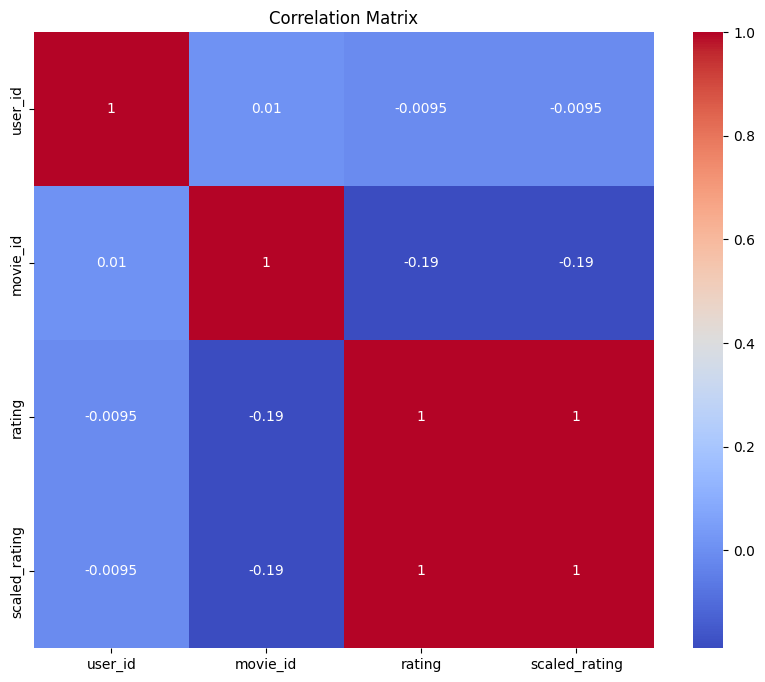

In [39]:
# Compute correlation matrix
correlation_matrix = movie_df.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [40]:
# Plot distribution of ratings
#sns.countplot(movie_df['rating'])
#plt.title("Distribution of Ratings")
#plt.xlabel("Rating")
#plt.ylabel("Count")
#plt.show()

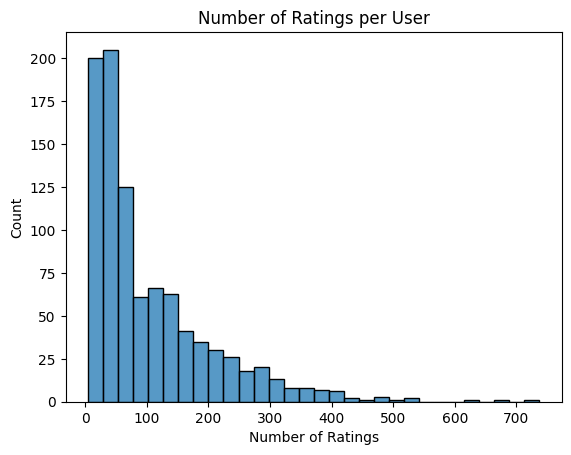

In [41]:
# Plot number of ratings per user
ratings_per_user = movie_df.groupby('user_id')['movie_id'].count()
sns.histplot(ratings_per_user, bins=30, kde=False)
plt.title("Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Count")
plt.show()


In [42]:
from surprise import accuracy

# Evaluate on the test set
predictions = svd.test(testset)

# Compute RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 0.6766
MAE:  0.5350
RMSE: 0.676630556062189
MAE: 0.5350131635362875


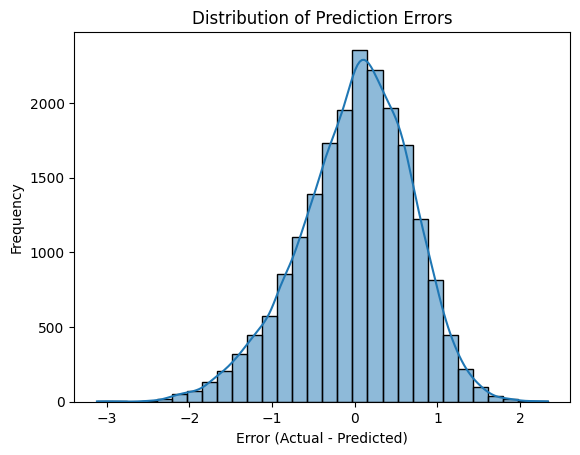

In [43]:
import numpy as np

# Compute prediction errors
errors = [pred.r_ui - pred.est for pred in predictions]

# Plot distribution of errors
sns.histplot(errors, bins=30, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


In [44]:
genre_df = movies_ref.copy()
genre_df = movies_ref.drop(['movie_title', 'release_date'], axis=1)
genre_df.head()

,movie_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [45]:
from sklearn.metrics.pairwise import cosine_similarity
genre_similarity_matrix = cosine_similarity(genre_df)

# Display similarity matrix
print("Genre Similarity Matrix:")
print(genre_similarity_matrix)

Genre Similarity Matrix:
[[1.         0.37796447 0.47434165 ... 0.49999982 0.50029735 0.49999991]
 [0.37796447 1.         0.83666003 ... 0.75592868 0.75592881 0.75592881]
 [0.47434165 0.83666003 1.         ... 0.94868296 0.94868313 0.94868313]
 ...
 [0.49999982 0.75592868 0.94868296 ... 1.         0.99999947 0.99999982]
 [0.50029735 0.75592881 0.94868313 ... 0.99999947 1.         0.99999965]
 [0.49999991 0.75592881 0.94868313 ... 0.99999982 0.99999965 1.        ]]


In [50]:
# print(f"Number of movies: {len(movie_ids)}")
# print(f"Similarity matrix shape: {genre_similarity_matrix.shape}")

In [47]:
total_movies = movies_df['movie_id'].nunique()
unique_movie_ids = movie_df['movie_id'].unique()

print(f"Total unique movies: {total_movies}")
print(f"First 10 unique movie IDs: {unique_movie_ids[:10]}")

Total unique movies: 1682
First 10 unique movie IDs: [ 61 189  33 160  20 202 171 265 155 117]


In [48]:

def get_similar_movies(movie_id, similarity_matrix, movie_ids, top_n=5):
    if len(movie_ids) != similarity_matrix.shape[0]:
        raise ValueError("The size of `movie_ids` does not match the dimensions of the similarity matrix.")

    # Verify movie_id exists in movie_ids
    if movie_id not in movie_ids:
        raise ValueError(f"Movie ID {movie_id} not found in movie_ids list.")

    # Find index of the given movie
    movie_idx = movie_ids.index(movie_id)

    # similarity scores for the given movie
    similarity_scores = list(enumerate(similarity_matrix[movie_idx]))

    # Sort by similarity scores in descending order
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    top_similar = [
        movie_ids[idx] for idx, score in sorted_scores[1:]  # Exclude the current movie
    ][:top_n]

    return top_similar

movie_ids = list(range(1, 1683))
movie_id = 1
top_similar_movies = get_similar_movies(movie_id, genre_similarity_matrix, movie_ids, top_n=2)
print(f"Top similar movies to Movie {movie_id}: {top_similar_movies}")


Top similar movies to Movie 1: [8, 4]


In [49]:
# Map movie IDs to their titles
movie_dict = dict(zip(movies_df['movie_id'], movies_df['movie_title']))

similar_movie_ids = [8, 4]
similar_movie_titles = [(movie_id, movie_dict.get(movie_id, "Unknown Title")) for movie_id in similar_movie_ids]

print(f"Top similar movies to Movie 1:")
for movie_id, title in similar_movie_titles:
    print(f"Movie ID: {movie_id}, Title: {title}")


Top similar movies to Movie 1:
Movie ID: 8, Title: Babe (1995)
Movie ID: 4, Title: Get Shorty (1995)


In [ ]:
df.to_csv('my_dataframe.csv', index=False)

In [ ]:
movie_cs = movies_ref[['movie_id', 'movie_title']]
movie_cs.to_csv('my_movie.csv', index=False)